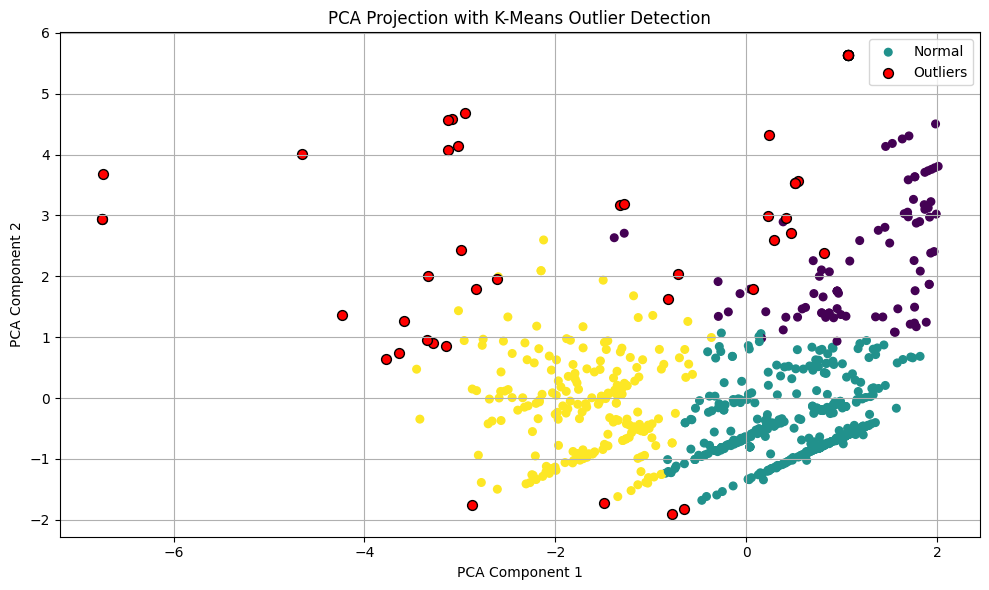

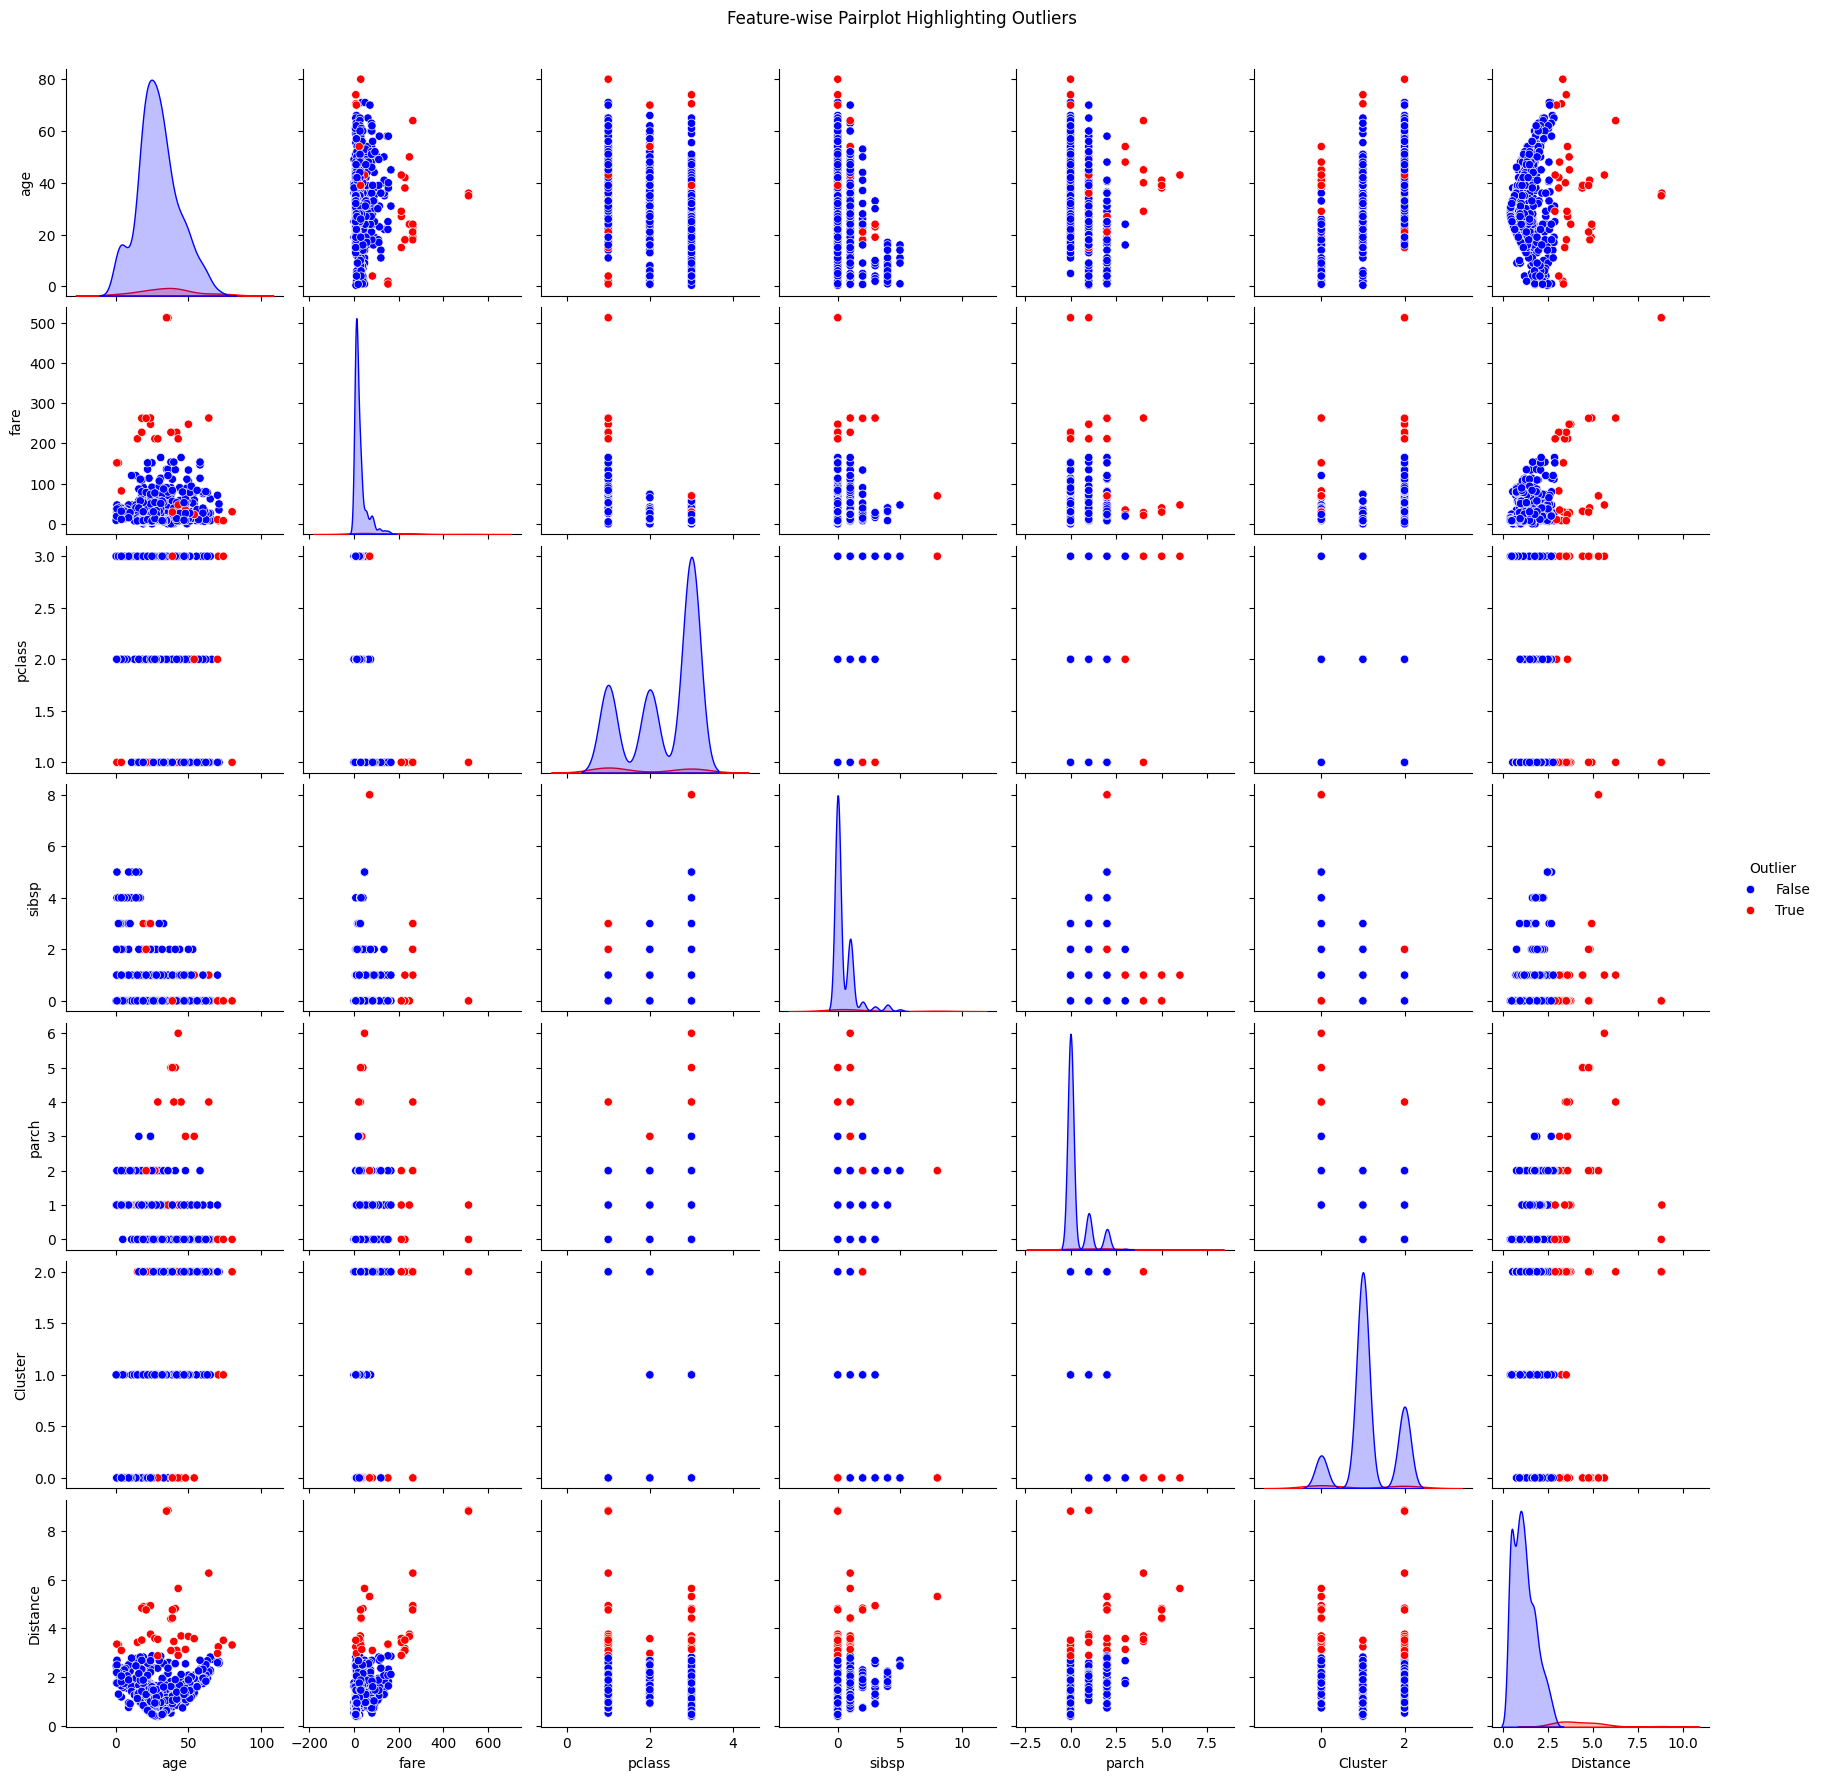

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load dataset
df = sns.load_dataset("titanic")

# Select numeric features and clean data
df = df[['age', 'fare', 'pclass', 'sibsp', 'parch']]
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Distance from cluster centroids
distances = np.linalg.norm(X_scaled - centroids[labels], axis=1)
threshold = np.percentile(distances, 95)
outliers = distances > threshold

# Create result DataFrame
df_result = df.copy()
df_result['Cluster'] = labels
df_result['Distance'] = distances
df_result['Outlier'] = outliers

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot 1: PCA 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[~outliers, 0], X_pca[~outliers, 1], c=labels[~outliers], cmap= 'viridis', s=30, label='Normal')
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], c='red', s=50, label='Outliers', edgecolors='black')
plt.title("PCA Projection with K-Means Outlier Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()

print()

# Plot 2: Seaborn Pairplot
sns.pairplot(df_result, hue='Outlier', palette={False: 'blue', True: 'red'}, diag_kind='kde')
plt.suptitle("Feature-wise Pairplot Highlighting Outliers", y=1.02)
plt.show()
